Todo:
- pořešit jednotu zápisů
- podíl největšího nakladatele / 3 největších apod.

In [2]:
import os
import re
import statistics
from src.najdi_rok import najdi_rok
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)

In [3]:
df = pd.read_parquet(os.path.join("data","cnb_vyber.parquet"))
df = df.explode('008')
df['rok'] = df['008'].apply(lambda x: najdi_rok(x))

In [4]:
df = df.dropna(subset=['245_a','100_a','rok'])

In [5]:
df = df.explode('260_b').explode('264_b')

In [6]:
def dvoje_nakladatelstvi(sedesat, sedesatctyri):
    if sedesat != None:
        return sedesat.replace(',','').replace(":",'').strip()
    elif sedesatctyri != None:
        return sedesatctyri.replace(',','').replace(":",'').strip()
    else:
        return None

In [7]:
df['nakladatel'] = df.apply(lambda row: dvoje_nakladatelstvi(row['260_b'], row['264_b']), axis=1)

In [8]:
df[(df['rok'] == 2021) & (df['nakladatel'].isnull())]

,008,020_a,020_c,020_q,041_a,041_h,041_ind1,044_a,072_a,072_x,080_a,100_4,100_7,100_a,100_d,240_l,245_a,245_c,245_n,245_p,246_a,250_a,250_b,260_a,260_b,260_c,260_e,260_f,260_ind1,264_a,264_b,264_c,264_ind2,300_a,300_b,300_c,490_a,490_v,500_a,520_a,520_b,521_a,546_a,648_a,650_a,650_x,650_y,650_z,651_a,653_a,655_a,700_4,700_7,700_a,700_d,710_4,710_7,710_a,710_b,830_a,928_a,964_a,leader,rok,nakladatel
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
cpk20243582322,220106t20212021xr a f 010 0 cze d,[978-80-01-06880-9],None,[(brožováno)],"[cze, eng]",[cze],1,None,[72],[Architektura],"[159.953.34, 37.091.3, 378.6:62, 69.01/.03, 72...",[aut],jk01130435,"Šlapeta, Vladimír,",1947-,None,K jubileu výuky architektury na českém vysokém...,autor Vladimír Šlapeta ; editor Jiří Horský ; ...,None,None,"[Vladimír Šlapeta - recollections remarks, Vla...",[První vydání],None,None,None,None,None,None,None,"[V Praze :, None]",None,"[[2021], ©2021]","[1, 4]",[179 stran :],[ilustrace ;],[24 cm],None,None,None,None,None,None,[Souběžný anglický text],[1920-2020],"[studium a výuka, vysoké technické školy, stav...","[pe, None, st, au, None, dějiny, None, dějiny,...",None,None,[Česko],None,"[jubilejní publikace, eseje]","[edt, trl]","[mzk2007408165, ntka174143]","[Horský, Jiří, Tharp, Martin,]","[None, 1970-]",[pbl],[kn20010710176],[České vysoké učení technické v Praze.],[Fakulta architektury],None,None,None,cam a22 i 4500,2021.0,None
nkc20193162890,191024t20212021xr a a 000 u cze d,[978-80-7292-380-9],None,[(vázáno)],[cze],[fre],1,None,[821-93-053.4],[Literatura pro nejmenší děti],"[821-93-053.4, 636.1/.9, (0.025.2), (086.7)]",[ill],xx0206378,"Billet, Marion,",1982-,Česky,Zvířátka na venkově :,ilustrovala Marion Billet ; z francouzského or...,None,None,None,None,None,None,None,None,None,None,None,"[Praha :, None]",None,"[[2021], ©2021]","[1, 4]",[16 nečíslovaných stran :],[barevné ilustrace ;],[15 cm],[Zvuková knížka],None,[Kartonové listy se zvukovými tlačítky a zvuko...,None,None,[Pro děti od 1 roku],None,None,"[domácí zvířata, domestic animals]",None,None,None,None,None,"[leporela, publikace pro nejmenší děti, knihy ...",[trl],[xx0042263],"[Kocmanová, Ivana,]",[1973-],None,None,None,None,[Zvuková knížka (Axióma)],None,None,cam a22 i 4500,2021.0,None
nkc20203174146,191104t20212021xr a a 000 j cze d,[978-80-7292-384-7],[349.00 Kč],[(vázáno) :],[cze],[fre],1,None,"[78.03, 0/9-053.2]","[Hudební styly, vlivy, školy, Literatura pro d...","[78.036.011.26, 780.61/.66, (0:82-32), (084.11...",[ill],xx0245721,"Le Huche, Magali,",1979-,Česky,Packa hraje rock /,ilustrovala Magali Le Huche ; z francouzského ...,None,None,None,None,None,None,None,None,None,None,None,"[Praha :, None]",None,"[[2021], ©2021]","[1, 4]",[30 nečíslovaných stran :],[barevné ilustrace ;],[21 cm],[Zvuková knížka],None,"[Obálkový podázev: 16 melodií k poslechu, List...",None,None,[Pro děti od 3 let],None,None,"[rock, hudební nástroje, rock music, musical i...",None,None,None,None,None,"[příběhy, obrazové publikace, knihy se zvuky, ...",[bkd],[xx0042263],"[Kocmanová, Ivana,]",[1973-],None,None,None,None,[Zvuková knížka (Axióma)],None,None,cam a22 i 4500,2021.0,None
nkc20203218126,200504t20212021xr a a 000 u cze d,[978-80-7292-995-5],"[Kč 259,00]","[(v knize neuvedeno ;, vázáno)]",None,None,None,None,[821-93-053.4],[Literatura pro nejmenší děti],"[821-93-053.4, 551.468, (0.025.2), (086.7)]",[ill],xx0206378,"Billet, Marion,",1982-,Česky,Moře :,ilustrace: Marion Billet,None,None,None,None,None,None,None,None,None,None,None,"[Praha :, None]",None,"[[2021], ©2021]","[1, 4]",[12 nečíslovaných stran :],[barevné ilustrace ;],[15 cm],[Zvuková knížka],None,"[Podle francouzského vydání, Kartonové listy s...",None,None,[Pro děti od 1 roku],None,None,"[moře, sea]",None,None,None,None,None,"[leporela, knihy se zvuky, publikace pro nejme...",None,None,None,None,None,None,None,None,[Zvuková knížka (Axióma)],None,None,cam a22 i 4500,2021.0,None
nkc20203239905,200727t20212021xr ab e 000 0 cz

In [9]:
df[df['nakladatel'].notnull()].groupby('rok').size() / df.groupby('rok').size()

rok
1900.0    1.000000
1901.0    1.000000
1902.0    0.999462
1903.0    0.999439
1904.0    1.000000
1905.0    0.999392
1906.0    0.999525
1907.0    0.999461
1908.0    1.000000
1909.0    1.000000
1910.0    0.999578
1911.0    0.999141
1912.0    1.000000
1913.0    0.999597
1914.0    0.998897
1915.0    1.000000
1916.0    1.000000
1917.0    1.000000
1918.0    0.998902
1919.0    0.999678
1920.0    1.000000
1921.0    1.000000
1922.0    0.999480
1923.0    0.999480
1924.0    0.999293
1925.0    0.999570
1926.0    1.000000
1927.0    0.999746
1928.0    0.998809
1929.0    0.999529
1930.0    0.998560
1931.0    0.999530
1932.0    0.998990
1933.0    0.999245
1934.0    0.999017
1935.0    0.999538
1936.0    0.999797
1937.0    0.999415
1938.0    0.999538
1939.0    0.998541
1940.0    0.998873
1941.0    1.000000
1942.0    1.000000
1943.0    1.000000
1944.0    1.000000
1945.0    0.999125
1946.0    0.999787
1947.0    1.000000
1948.0    0.999546
1949.0    1.000000
1950.0    1.000000
1951.0    1.000000
1952.0  

In [10]:
df['nakladatel'].sample(50)

001
bk196403814                                                    SZdN
bk198104401                                                     VUT
cpk20203216682                                               [s.n.]
nkc20122346043                                        J. R. Stehlík
ck8500785                                                       SPN
cpk19960138358                                              Septima
nkc20183044437                                             Fragment
bk196701930                                                    SNTL
nkc20142611200                                         Šulc - Švarc
bk194002793                                                   Orbis
nkc20152681331                                       Computer Press
bk196400129                                       Východočes. nakl.
bk193200422                                             Václav Pour
nkc20223419367                                           Powerprint
bk192603598                                 

In [11]:
df[df['100_7'].astype(str).str.contains('jx20100301005',na=False)]

,008,020_a,020_c,020_q,041_a,041_h,041_ind1,044_a,072_a,072_x,080_a,100_4,100_7,100_a,100_d,240_l,245_a,245_c,245_n,245_p,246_a,250_a,250_b,260_a,260_b,260_c,260_e,260_f,260_ind1,264_a,264_b,264_c,264_ind2,300_a,300_b,300_c,490_a,490_v,500_a,520_a,520_b,521_a,546_a,648_a,650_a,650_x,650_y,650_z,651_a,653_a,655_a,700_4,700_7,700_a,700_d,710_4,710_7,710_a,710_b,830_a,928_a,964_a,leader,rok,nakladatel
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
nkc20182997195,180516s2018 xr g 000 j cze,[978-80-7549-850-2],None,[(vázáno)],None,None,None,None,[821.162.3-3],[Česká próza],"[821.162.3-32, (0:82-323.1)]",[aut],jx20100301005,"Kašpárek, Michal,",1984-,None,Hry bez hranic /,Michal Kašpárek,None,None,None,[Vydání první],None,None,None,None,None,None,None,[Praha :],"Euromedia,",[2018],[1],[156 stran ;],None,[19 cm],None,None,None,None,None,None,None,None,None,None,None,None,None,None,"[české novely, satirické novely, Czech novella...",None,None,None,None,None,None,None,None,None,[Euromedia Group - Listen],None,nam a22 i 4500,2018.0,Euromedia
nkc20233549616,230925s2023 xr g 000 f cze,[978-80-7637-400-3],None,[(brožováno)],None,None,None,None,[821.162.3-3],[Česká próza],"[821.162.3-31, (0:82-31)]",[aut],jx20100301005,"Kašpárek, Michal,",1984-,None,Fosilie /,Michal Kašpárek,None,None,None,[Vydání první],None,None,None,None,None,None,None,[V Praze :],"Paseka,",[2023],[1],[183 stran ;],None,[20 cm],None,None,None,"[Tři generace, tři životní názory a postoje. D...","[Děda, bývalý učitel tělocviku, vnímá, že svět...",None,None,None,None,None,None,None,None,None,"[české romány, Czech fiction]",None,None,None,None,None,None,None,None,None,None,None,nam a22 i 4500,2023.0,Paseka


In [12]:
df[df['nakladatel'] == 'Listen'].sort_values(by='rok')

,008,020_a,020_c,020_q,041_a,041_h,041_ind1,044_a,072_a,072_x,080_a,100_4,100_7,100_a,100_d,240_l,245_a,245_c,245_n,245_p,246_a,250_a,250_b,260_a,260_b,260_c,260_e,260_f,260_ind1,264_a,264_b,264_c,264_ind2,300_a,300_b,300_c,490_a,490_v,500_a,520_a,520_b,521_a,546_a,648_a,650_a,650_x,650_y,650_z,651_a,653_a,655_a,700_4,700_7,700_a,700_d,710_4,710_7,710_a,710_b,830_a,928_a,964_a,leader,rok,nakladatel
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
cpk19970277303,980429s1997 xr c e 000 mdcze,[80-902360-0-6],None,[(brož.)],None,None,None,None,[394],[Veřejný a společenský život. Každodenní život],[392/396],[aut],jn19990218034,"Jirků, Irena,",1963-,None,Tvář na dluh /,"[texty Irena Jirků, Marcela Kašpárková, Boris ...",None,None,None,[1. vyd.],None,[Jihlava :],"Listen,",[1997],None,None,None,None,None,None,None,[173 s. :],[portréty ;],[21 cm],None,None,None,None,None,None,None,[1940-1997],[každodenní život],None,[1940-1997],[Česko],None,None,[literatura faktu],"[aut, aut, com]","[jn19990218042, jn19990218017, ntka174193]","[Kašpárková, Marcela,, Dočekal, Boris,, Turek,...","[1962-, 1950-, 1939-]",None,None,None,None,None,None,None,nam a22 a 4500,1997.0,Listen
cpk19980318422,980518s1998 xr c e 000 m cze,[80-902360-1-4],None,[(váz.)],None,None,None,None,[316.4/.7],[Sociální interakce. Sociální komunikace],"[316.346.2, 177.6, 316.346.2-055.2, 7.04, (047...",[aut],jn19990218017,"Dočekal, Boris,",1950-,None,"Pane, to je krása :",Boris Dočekal,None,None,None,[1. vyd.],None,[Jihlava :],"Listen,",[1998],None,None,None,None,None,None,None,[111 s. :],[portréty (některé barev.) ;],[22 cm],None,None,None,None,None,None,None,None,"[muži a ženy, partnerské vztahy, ženy, uměleck...",None,None,None,None,None,"[fotografické publikace, rozhovory, photograph...",[aut],[jn19990209462],"[Labuda, Marián,]",[1944-2018],None,None,None,None,None,None,None,nam a22 a 4500,1998.0,Listen
cpk19990738645,990927s1999 xr acf e 000 macze,[80-902360-2-2],None,[(váz.)],None,None,None,None,"[7.01/.09, 929]","[Umění, Biografie]","[75.071.1, 929, 7.071, 001.83-027.22, (0:82-94)]","[aut, art]",jn19990009901,"Kundera, Rudolf,",1911-2005,None,Rendez-vous s Rudolfem Kunderou :,Irena Jirků,None,None,None,[1. vyd.],None,[Jihlava :],"Listen,",[1999],None,None,None,None,None,None,None,"[117 s., [32] s. obr. příl. (některé barev.) :]","[il., portréty ;]",[22 cm],None,None,"[Životopisná data R. Kundery, Poznámka o význa...",None,None,None,None,[20. století],"[malíři, umělci, intelektuální život, painters...",None,"[20. století, 20. století, 20. století, 20th c...","[Česko, None, None, Czechia, None, None]",None,None,"[autobiografické vzpomínky, vzpomínky, autobio...",[aut],[jn19990218034],"[Jirků, Irena,]",[1963-],None,None,None,None,None,None,None,nam a22 a 4500,1999.0,Listen
cpk20000703085,000505s2000 xr af e 000 macze,[80-902360-3-0],None,[(váz.)],None,None,None,None,[929],[Biografie],"[929, 791/792.071.2, (047.53), (0:82-94)]",[aut],jn19990009653,"Lasica, Milan,",1940-2021,None,Melancholický klaun Milan Lasica :,Boris Dočekal,None,None,None,[1. vyd.],None,[Jihlava :],"Listen,",[2000],None,None,None,None,None,None,None,"[127 s., [8] s. obr. příl. :]",[il. ;],[21 cm],None,None,None,None,None,None,None,None,"[herci, Actors and actresses]","[None, Interviews]",None,"[Slovensko, Slovakia]",None,None,"[vzpomínky, rozhovory]",[ivr],[jn19990218017],"[Dočekal, Boris,]",[1950-],None,None,None,None,None,None,None,cam a22 a 4500,2000.0,Listen
cpk20000980115,010201s2000 xr ac e 000 mdcze,[80-902360-4-9],None,[(váz.)],None,None,None,None,[929],[Biografie],"[929, (437.3), (0:82-94), (082)]",[com],jn19990218017,"Dočekal, Boris,",1950-,None,"Maminka, tatínek a já :",Boris Dočekal,None,None,None,[1. vyd.],None,[Jihlava :],"Listen,",[2000],None,None,None,None,None,None,None,[133 s. :],"[il., portréty ;]",[22 cm],None,None,None,None,None,None,None,None,"[osobnosti, osobnosti, celebrities, celebrities]","[None, dětství, None, childhood]",None,"[Česko, None, Czechia, None]",Non

In [13]:
df[df['nakladatel'] == 'Paseka'].sort_values(by='rok')

,008,020_a,020_c,020_q,041_a,041_h,041_ind1,044_a,072_a,072_x,080_a,100_4,100_7,100_a,100_d,240_l,245_a,245_c,245_n,245_p,246_a,250_a,250_b,260_a,260_b,260_c,260_e,260_f,260_ind1,264_a,264_b,264_c,264_ind2,300_a,300_b,300_c,490_a,490_v,500_a,520_a,520_b,521_a,546_a,648_a,650_a,650_x,650_y,650_z,651_a,653_a,655_a,700_4,700_7,700_a,700_d,710_4,710_7,710_a,710_b,830_a,928_a,964_a,leader,rok,nakladatel
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ck9104408,911009s1990 xr a e 000 f cze,[80-85192-01-2],None,[(vázáno)],None,None,None,None,[821.162.3-3],[Česká próza],"[821.162.3-31, (0:82-31)]",[aut],jk01060531,"Klíma, Ladislav,",1878-1928,None,Utrpení knížete Sternenhocha :,Ladislav Klíma ; ilustrace Karel Nepraš,None,None,None,[Vydání 3.],None,None,None,None,None,None,None,[Praha :],"Paseka,",[1990],[1],[203 stran :],[ilustrace ;],[21 cm],None,None,[45000 výtisků],None,None,None,None,None,None,None,None,None,None,None,"[české romány, Czech fiction]",[ill],[jk01083190],"[Nepraš, Karel,]",[1932-2002],None,None,None,None,None,None,"[Klíma, Ladislav (spisovatel a filozof čes., 1...",nam a22 i 4500,1990.0,Paseka
np9433293,950103s1990 xr a g 000 f cze,[80-85192-00-4],"[Kčs 37,00]",[(vázáno) :],None,None,None,None,[821.162.3-3],[Česká próza],"[821.162.3-31, 82-91, 087.6, (437.3), (0:82-31...","[aut, ill]",jk01141125,"Váchal, Josef,",1884-1969,None,Krvavý román /,Josef Váchal,None,None,None,[Vydání třetí],None,None,None,None,None,None,None,[Praha :],"Paseka,",[1990],[1],[318 stran :],[ilustrace ;],[21 cm],[Knihy Josefa Váchala ;],[svazek I.],[40000 výtisků],None,None,None,None,None,"[populární literatura, kolportážní literatura,...",None,None,"[Česko, Česko, Czechia, Czechia]",None,None,"[české romány, parodie, autorské knihy, studie...",None,None,None,None,None,None,None,None,None,None,None,nam a22 i 4500,1990.0,Paseka
cpk20000533892,910220s1990 xr ac e 001 0 cze,[80-85192-03-9],"[Kčs 39,00]",[(váz.) :],None,None,None,None,[641],[Kuchařství. Potraviny. Vařená jídla],"[641.55, (083.12)]",[aut],jk01060037,"Kejřová, Anuše,",1874-1926,None,Úsporná kuchařka :,z vlastních zkušeností napsala a sestavila Anu...,None,None,[Zlatá kniha malé domácnosti],None,None,[Praha :],"Paseka,",[1990],None,None,None,None,None,None,None,[330 s. :],"[il., portréty ;]",[21 cm],None,None,"[95000 výt., Obsahuje rejstřík]",None,None,None,None,None,[jídla],None,None,None,None,None,[kuchařské recepty],None,None,None,None,None,None,None,None,None,None,None,nam a22 a 4500,1990.0,Paseka
nkc20070535080,920805s1990 xr a g 000 f cze,[80-85192-05-5],"[Kčs 24,00]",[(váz.) :],None,None,None,None,[821.162.3-3],[Česká próza],"[821.162.3-3, (0:82-3)]",[aut],xx0012051,"Cír, Jaroslav,",1966-,None,Zahrada s kocourem /,Jaroslav Cír ; [ilustrovala Lenka Stará],None,None,None,[Vyd. 1.],None,[Praha :],"Paseka,",[1990],None,None,None,None,None,None,None,[101 s. :],[il. ;],[18 cm],None,None,[5000 výt.],None,None,None,None,None,None,None,None,None,None,None,[české prózy],None,None,None,None,None,None,None,None,None,None,None,nam a22 a 4500,1990.0,Paseka
ck9201658,920410s1991 xr a u0|0 cze,[80-85192-10-1],None,[(váz.)],None,None,None,None,None,None,[718(=924)(437.1/.2)(084.1)],[pht],None,"Ehl, Petr",None,None,Staré židovské hřbitovy Čech a Moravy :,"[fotogr.] Petr Ehl ; [text] Arno Pařík, Jiří F...",None,None,None,[Vyd. 1.],None,[Praha :],"Paseka,",[1991],None,[(Svoboda)],None,None,None,None,None,[173 s. :],[il. ;],[28 cm],None,None,"[Frontispis, Zdobené předsádky, 4000 výt.]",None,None,None,None,None,None,None,None,None,None,None,[fotografické publikace],"[aut, aut]","[jo20000074497, jk01031083]","[Pařík, Arno,, Fiedler, Jiří,]","[1948-, 1935-2014]",None,None,None,None,None,None,[Čechy - Morava - hřbitovy židovské - publikac...,nam a22 4500,1991.0,Paseka
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

## Nejproduktivnější nakladatelství

In [15]:
df.groupby('nakladatel').size().nlargest(60)

nakladatel
SPN                                  22748
SNTL                                 13404
MOBA                                  9224
Mladá fronta                          8012
Albatros                              7876
Československý spisovatel             6187
Grada                                 5998
Orbis                                 5694
Práce                                 5611
Naše vojsko                           5322
ČVUT                                  5123
Knižní klub                           5034
Dilia                                 4639
Ikar                                  4548
Ivo Železný                           4452
Fragment                              4241
nákladem vlastním                     4200
Odeon                                 4134
Academia                              3976
Svoboda                               3975
Státní pedagogické nakladatelství     3898
Argo                                  3567
Portál                                3353


In [16]:
df[df['rok'] > 2013].groupby('nakladatel').size().nlargest(60)

nakladatel
MOBA                                           3705
Euromedia Group                                2541
Dobrovský s.r.o.                               2427
Fragment                                       2002
Argo                                           1896
Albatros                                       1880
CPress                                         1880
Ikar                                           1645
Mladá fronta                                   1323
Host                                           1298
Grada                                          1225
Svojtka & Co.                                  1207
Portál                                         1183
Knižní klub                                    1156
Grada Publishing                               1004
Nová Forma                                      976
Univerzita Palackého v Olomouci                 913
Wolters Kluwer                                  887
Academia                                        858
B

## Počet jednotlivých nakladatelství

<Axes: xlabel='rok'>

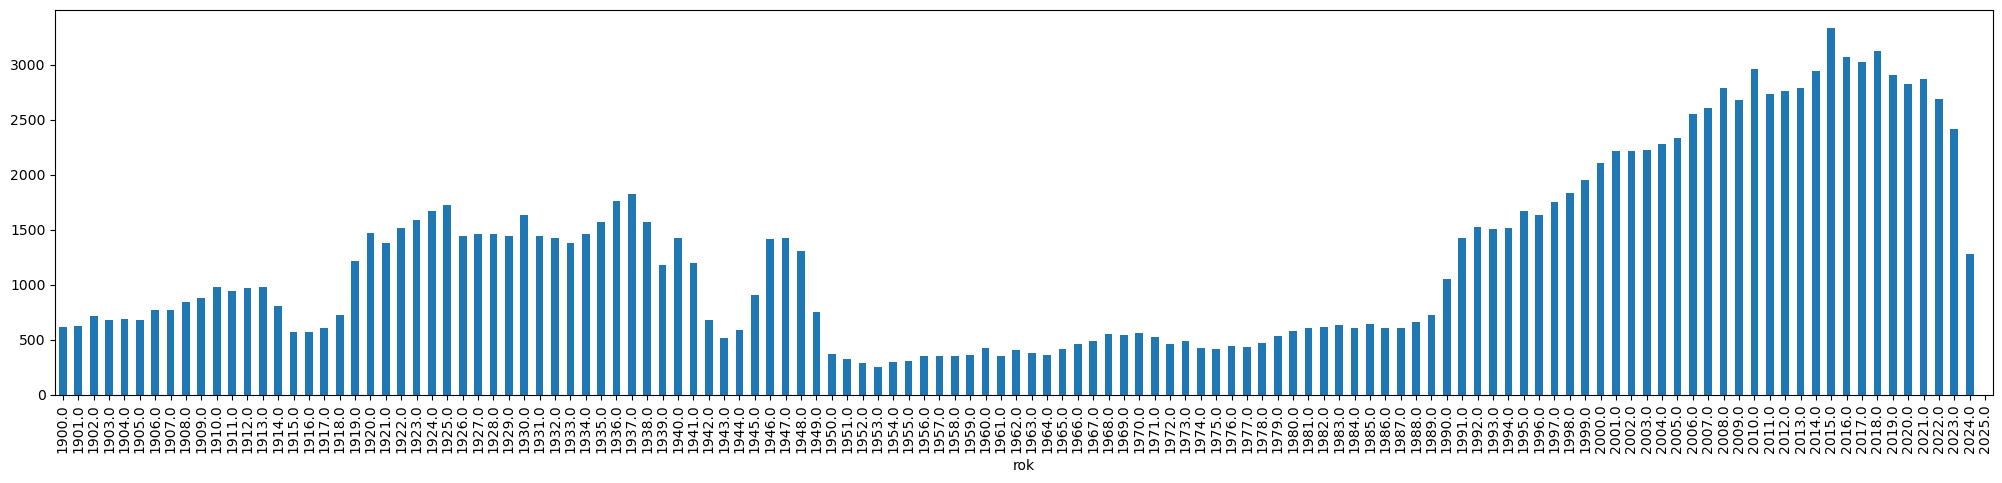

In [18]:
df.groupby('rok')['nakladatel'].nunique().plot.bar(figsize=(25,5))

In [44]:
df.groupby('rok')['nakladatel'].nunique().nlargest()

rok
2015.0    3330
2018.0    3123
2016.0    3069
2017.0    3023
2010.0    2962
Name: nakladatel, dtype: int64

In [19]:
df[df['rok'] == 1953].groupby('nakladatel').size().nlargest(15)

nakladatel
SPN                                           608
SNTL                                          335
Orbis                                         315
Práce                                         199
Československý spisovatel                     173
Naše vojsko                                   149
SZN                                           140
Nakladatelství Československé akademie věd    127
SNDK                                          126
Státní pedagogické nakladatelství             126
SNKLHU                                        123
ČDLJ                                          120
SZdN                                           97
Mladá fronta                                   87
SNPL                                           82
dtype: int64

## Počet nových nakladatelství

<Axes: xlabel='rok'>

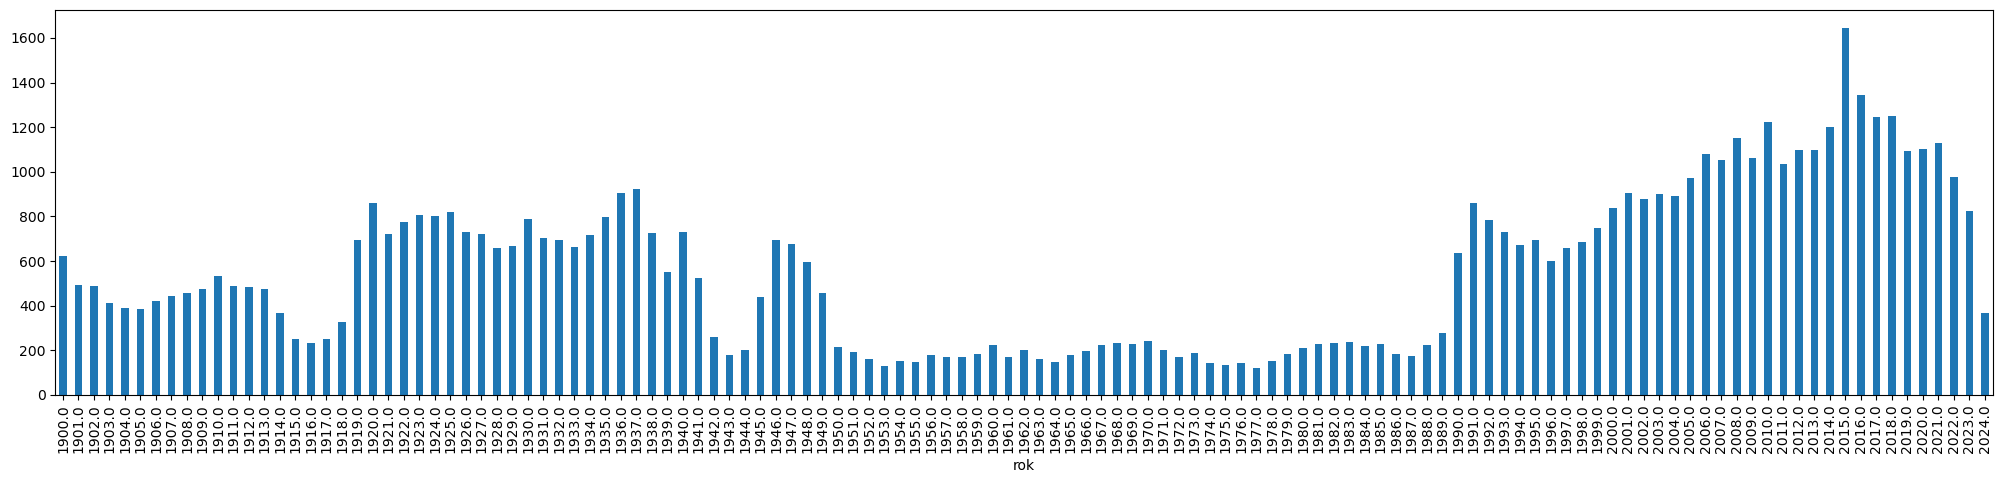

In [21]:
pd.DataFrame(df.groupby('nakladatel')['rok'].min()).groupby('rok').size().plot.bar(figsize=(25,5))

## Počet končících nakladatelství

<Axes: xlabel='rok'>

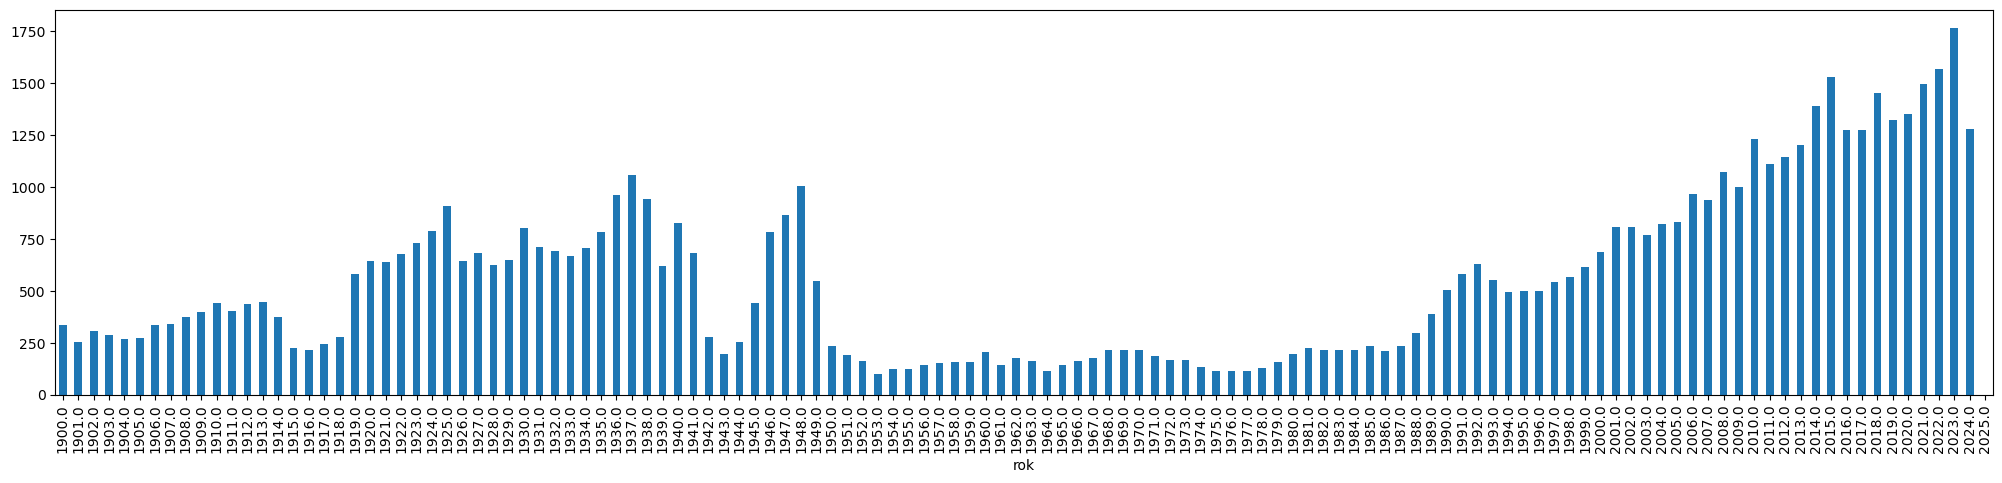

In [23]:
pd.DataFrame(df.groupby('nakladatel')['rok'].max()).groupby('rok').size().plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

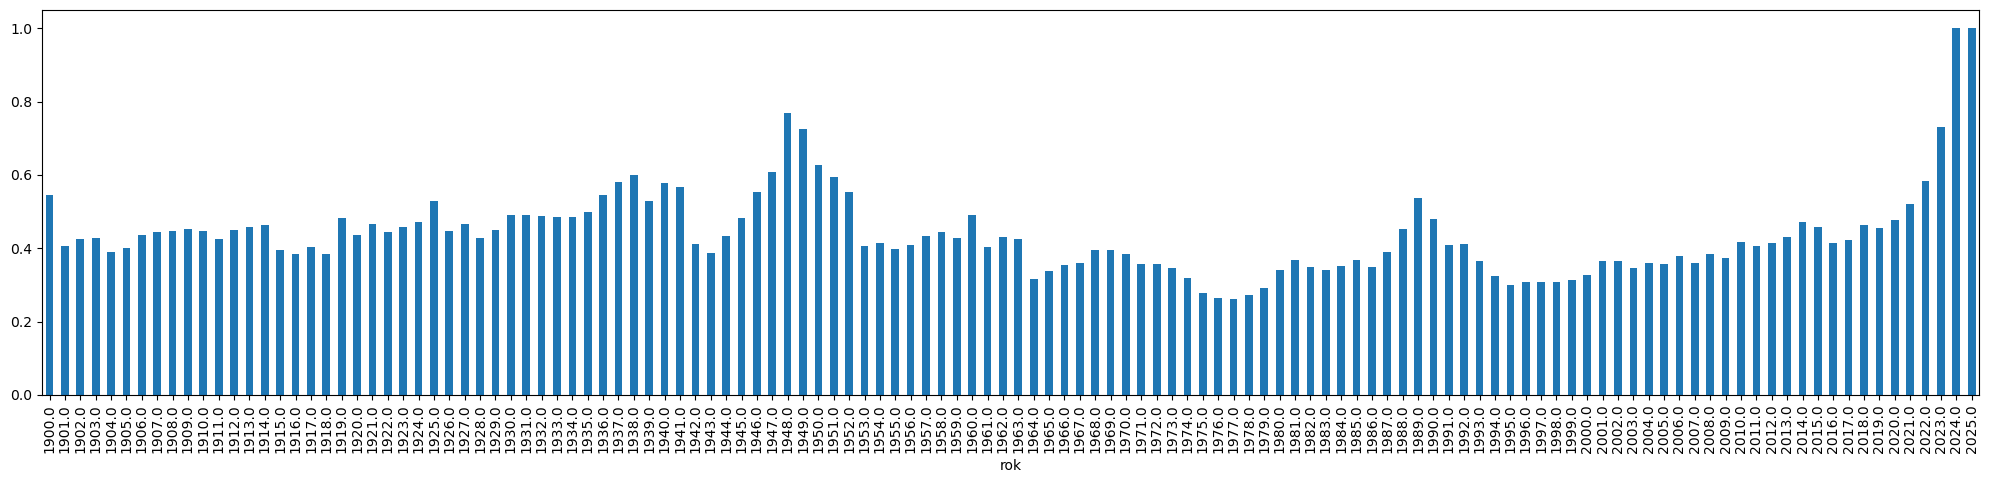

In [54]:
(pd.DataFrame(df.groupby('nakladatel')['rok'].max()).groupby('rok').size() / df.groupby('rok')['nakladatel'].nunique()).plot.bar(figsize=(25,5))

In [56]:
(pd.DataFrame(df.groupby('nakladatel')['rok'].max()).groupby('rok').size() / df.groupby('rok')['nakladatel'].nunique()).nlargest(10)

rok
2024.0    1.000000
2025.0    1.000000
1948.0    0.769762
2023.0    0.730626
1949.0    0.725594
1950.0    0.627660
1947.0    0.607293
1938.0    0.598601
1951.0    0.595092
2022.0    0.583333
dtype: float64

In [48]:
pd.DataFrame(df[df['rok'] < 1990].groupby('nakladatel')['rok'].max()).groupby('rok').size().nlargest(5)

rok
1937.0    1076
1948.0    1032
1936.0     969
1938.0     957
1925.0     917
dtype: int64

In [24]:
pd.DataFrame(df.groupby('nakladatel')['rok'].max()).groupby('rok').size()

rok
1900.0     338
1901.0     255
1902.0     306
1903.0     290
1904.0     269
1905.0     273
1906.0     335
1907.0     343
1908.0     377
1909.0     398
1910.0     440
1911.0     402
1912.0     438
1913.0     449
1914.0     373
1915.0     225
1916.0     218
1917.0     246
1918.0     278
1919.0     584
1920.0     643
1921.0     641
1922.0     676
1923.0     731
1924.0     787
1925.0     910
1926.0     645
1927.0     685
1928.0     627
1929.0     650
1930.0     802
1931.0     711
1932.0     693
1933.0     669
1934.0     709
1935.0     785
1936.0     960
1937.0    1058
1938.0     941
1939.0     622
1940.0     825
1941.0     681
1942.0     280
1943.0     198
1944.0     255
1945.0     440
1946.0     786
1947.0     866
1948.0    1003
1949.0     550
1950.0     236
1951.0     194
1952.0     161
1953.0     103
1954.0     125
1955.0     124
1956.0     145
1957.0     154
1958.0     157
1959.0     157
1960.0     208
1961.0     143
1962.0     177
1963.0     162
1964.0     114
1965.0     143
1966.0